<a href="https://colab.research.google.com/github/Mathias2204/Data_Science_MK/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coding Task 2**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm

!pip install pillow_heif 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 54.9 MB/s eta 0:00:00


## Subtask 1

Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!pip install pyheif
!pip install Pillow

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 46.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# coverting a heic image file to a png image file
import pyheif
from PIL import Image

def converter(url_name):
  url_pre  = '/content/drive/MyDrive/images/'
  image = pyheif.read(url_pre+url_name)
  image = Image.frombytes(
      image.mode,
      image.size,
      image.data,
      "raw",
      image.mode,
      image.stride,
  )

  url_name = url_name.split('.')[0]+'.png'
  image.save(url_pre+url_name, "PNG")

converter('IMG_5379.HEIC')

In [4]:
# All the images in the folder are converted to png images and saved to a new folder using a loop

import os
from PIL import Image

def folder_converter(folder_path, output_folder):
  for filename in os.listdir(folder_path):
    if filename.endswith('.HEIC'):
      input_path = os.path.join(folder_path, filename)
      output_path = os.path.join(output_folder, filename.split('.')[0]+'.png')

      image = pyheif.read(input_path)
      image = Image.frombytes(
        image.mode,
        image.size,
        image.data,
        "raw",
        image.mode,
        image.stride,
      )
      image.save(output_path, "PNG")

folder_converter('/content/drive/MyDrive/images/', '/content/drive/MyDrive/images_png/')

# Subtask 2

With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


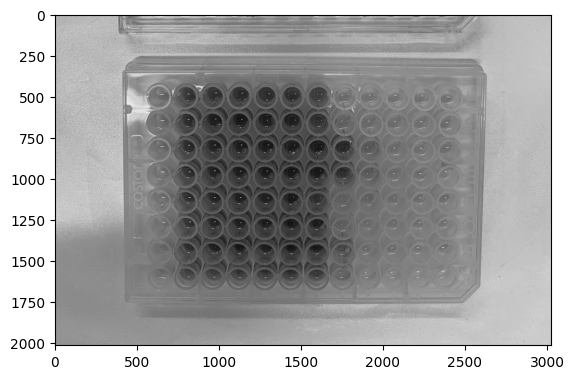

In [7]:
#  generating a grayscale version of the lower part of the image
url_pre  = '/content/drive/MyDrive/images_png/'
url_name = 'IMG_5379.png'
imageRGB  = io.imread(url_pre+url_name)
imageRGB = imageRGB[imageRGB.shape[0]//2:imageRGB.shape[0],:]
image = imageRGB[:,:,2]
plt.imshow(image,cmap = 'gray')
plt.show()

<ipython-input-8-371f757c15d7>:2: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(image,selem=skm.disk(20))


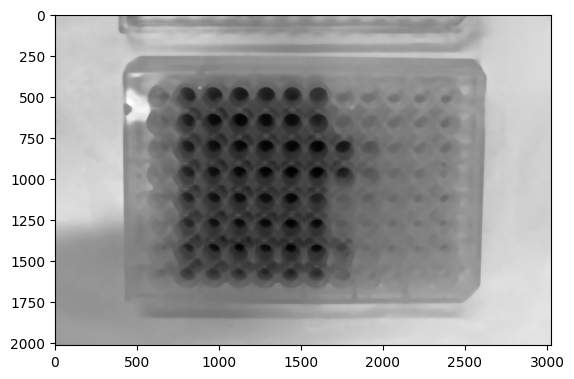

In [8]:
# The reflections in the black bins are removed by using a filter.
image_mean = skf.median(image,selem=skm.disk(20))
plt.imshow(image_mean, cmap ='gray')
plt.show()

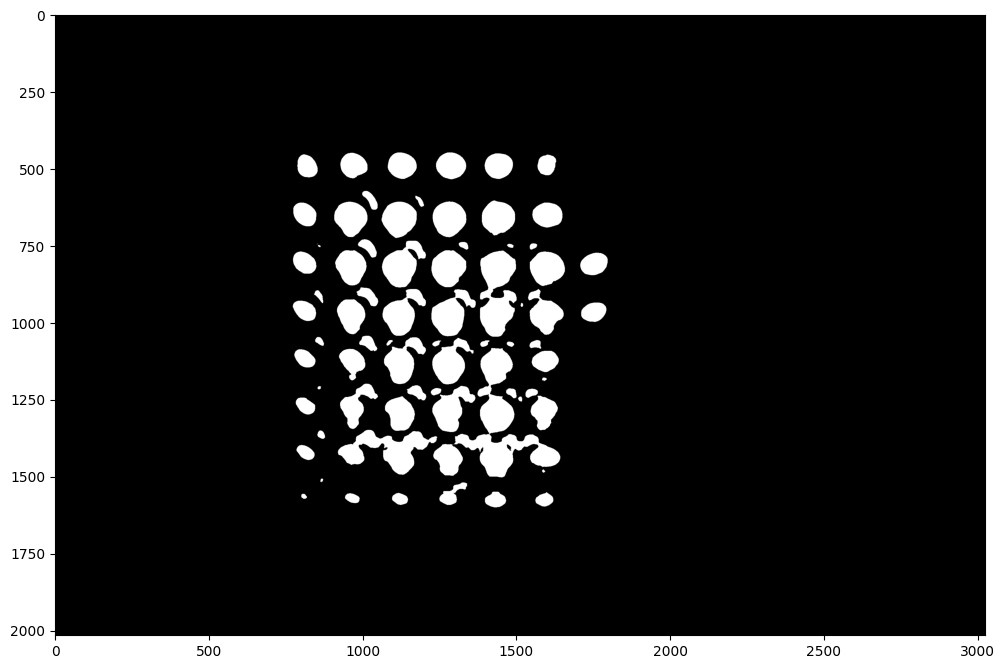

In [89]:
#create a mask using a logical operation

threshold_manual = 64

image= image_mean<threshold_manual

plt.figure(figsize=(12, 12))
plt.imshow(image, cmap ='gray')
plt.show()

In [83]:
# Let us play with the threshold iteractively to find a good value
from ipywidgets import *

def update(threshold_manual = 120):
  image_threshold = image_mean<threshold_manual
  plt.figure(figsize=(12, 12))
  plt.imshow(image_threshold, cmap ='gray')
  plt.show()

interact(update);

interactive(children=(IntSlider(value=120, description='threshold_manual', max=360, min=-120), Output()), _dom…

In [8]:
# Get the shape of the array
print("Shape:", image.shape)

# Get the data type of the array
print("Data type:", image.dtype)

# Get the total number of elements in the array
print("Size:", image.size)

# Get the number of dimensions
print("Number of dimensions:", image.ndim)

# Get the minimum and maximum values
print("Minimum value:", image.min())
print("Maximum value:", image.max())

# Get the mean and standard deviation
print("Mean:", image.mean())
print("Standard deviation:", image.std())

Shape: (2016, 3024)
Data type: bool
Size: 6096384
Number of dimensions: 2
Minimum value: False
Maximum value: True
Mean: 0.005011331307214244
Standard deviation: 0.0706131564635348


# Subtask 3

Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google.

---



In [91]:
# sliding window approach using IMG_5379
def count_white_regions(image, window_size, area_threshold, stride):
    height, width = image.shape[:2]
    count = 0

    for y in range(0, height - window_size[1] + 1, stride[1]):
        for x in range(0, width - window_size[0] + 1, stride[0]):
            window = image[y:y+window_size[1], x:x+window_size[0]]
            white_pixels = np.sum(window)

            if white_pixels > area_threshold:
                count += 1

    return count

window_size = (150, 150)
area_threshold = 200
stride = (150, 150)

count = count_white_regions(image, window_size, area_threshold, stride)
print("Number of regions with substantial white content:", count)


Number of regions with substantial white content: 50


Comment on this task: There were indeed 50 strongly colored bins on this image. The 4 only very sligthly colored bins cannot be counted, due to the contrast issue described in subtask 2. The size of the sliding window has to be adjusted to the bin size in the image to get the correct count. To make sure that the result is not only true by coincidence, it settings for the sliding window algorithm can be tested manualy by using different thresholds of the same image, is it is ilustrated in the following part. As well, a relatively small area_threshold value is desirable, because that is another hint for a correct placement of the sliding window "grid". A value of 200 means that less than 1 % of the pixels in the window are white for a count in this example.

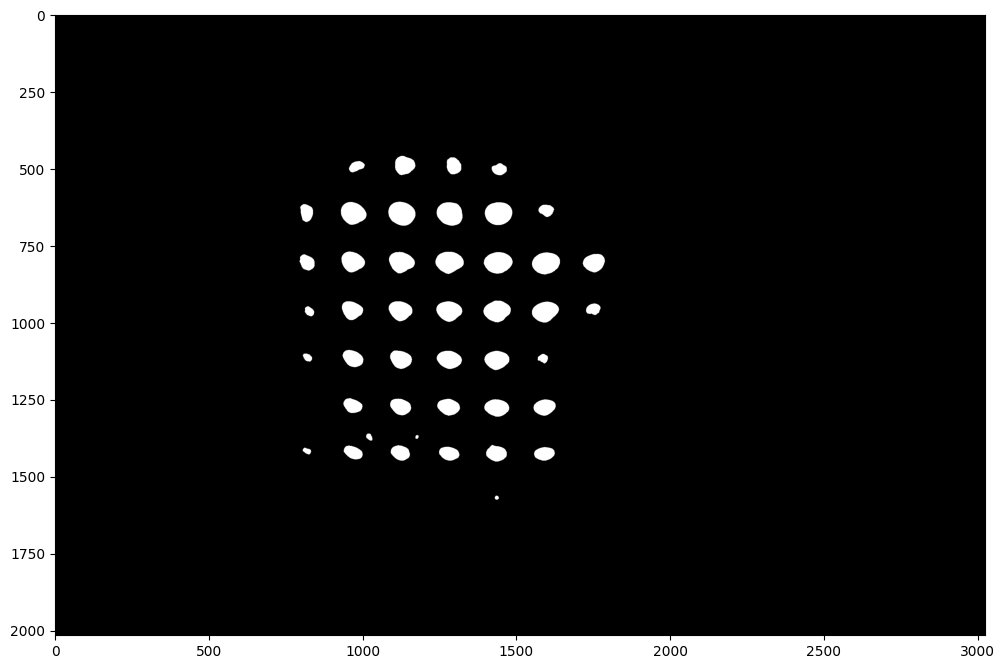

In [97]:
# Another example for IMG_5379, using a lower threshold, which means that not all colored bins are actually visible
threshold_manual = 48

#create a mask using a logical operation
image= image_mean<threshold_manual

plt.figure(figsize=(12, 12))
plt.imshow(image, cmap ='gray')
plt.show()

In [96]:
# sliding window approach using IMG_5379 with less visible bins. The algorthim delivers still the correct value for the chosen window size.
def count_white_regions(image, window_size, area_threshold, stride):
    height, width = image.shape[:2]
    count = 0

    for y in range(0, height - window_size[1] + 1, stride[1]):
        for x in range(0, width - window_size[0] + 1, stride[0]):
            window = image[y:y+window_size[1], x:x+window_size[0]]
            white_pixels = np.sum(window)

            if white_pixels > area_threshold:
                count += 1

    return count

window_size = (150, 150)
area_threshold = 100
stride = (150, 150)

count = count_white_regions(image, window_size, area_threshold, stride)
print("Number of regions with substantial white content:", count)


Number of regions with substantial white content: 42


# Subtask 4

Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good.

Comment: Outgoing for the method developed in subtask 3, there are the following issues to solve for an algorithm which should work for all images: A generally usefull threshold value to convert the colored bins into white segments has to be found and a sliding window size which works for all images. Since the bins are positioned differently, this will not be trivial. 

I was not able to write an algorithm for this, but the following procedure could be used:

- The box containing the bins needs to be extracted, with the same resultion for all of the images. The problem is that it differs not really from the background.
- Then the procedure of subtask 2 needs to be performed
- The parameter of the alorithm in subtask needs to be altered in a way that  the sliding window has the size of exactly one bin. All the boxes itself are identical and contain boxes contain 12 x 8 bins.